In [ ]:
'''해야할 일
   1)Ward 방법 추가 조사하기
   2)덴드로그램에서 두 군집이 만날 때 가지의 세로 길이가 군집이 서로 멀리 떨어진 정도를 의미하는 지 확인하기.
   3)Kmeans 동작원리 조사하기
     군집의 중심이 변화가 없을 때까지 반복한다. vs 모든 개체가 특정 군집에 속할 때까지 반복한다.
   4)군집분석 barplot, piechart, 군집수 확인하는 chart 작성하기(조윤호교수님 코드)
   5)다른 sklearn 클러스터링 기법과 코호넨 네트워크 조사하기
'''

In [1]:
import pandas as pd
data = pd.read_csv('data/Ashopping.csv', encoding='cp949')

## 군집분석(Clustering)
명확한 분류기준이나 그룹수가 정해지지 않은 때 개체를 유의미한 동질적인 집단으로 분류하는 기법이다.
- 개체들간 유사성을 측정하여 유사성이 높은 대상들을 묶어 전체를 세분화함으로써 데이터 전체 구조와 특성을 파악할 수 있고 추후 해당군집으로 편입될 고객 예측, 집단별 성격분석 등이 가능하다.
- 군집분석 과정은 아래와 같다.<br>
  1)군집분석 목적과 데이터 특성에 따라 최적의 군집분석 방법을 결정하고 탐색적인 목적이 강하거나 분류 개체의 규모가 크지 않을 경우에는 계층적 군집분석, 내부적으로 확정된 군집수에 의해 대규모 분류 개체를 적용할 경우 비계층적 군집분석 방법을 택한다.<br>
  2)개체들을 군집화하는데 사용할 분석변수들을 지정한다. 지정한 모든 분석변수에 대해 유사성을 측정하기에 가급적 수치형 변수를 사용함이 바람직하다.<br>
  3)군집분석은 이상치에 취약하여 분석변수들을 기준으로 개체들의 분포를 파악하고 이상치는 제외시켜야 한다. 이상치에 해당하는 개체는 소속된 군집의 속성값을 왜곡시켜 군집간 유사성 계산시 잘못된 거리값을 파생시키키 때문에 비현실적인 군집결과를 산출할 수 있다. <br>
  4)분석변수들의 특성을 바탕으로 가장 적합한 유사성 측정방식을 택해 개체간, 군집간 유사성을 평가한다.<br>
  $~~$ • 유클리디안 거리: 일반적인 2차원 상의 거리척도로써 군집분석에서 가장 자주 사용되는 거리 측정방식이다. 두 개체들 간 최소거리를 의미한다.※ 유클리디안 거리의 제곱값을 유클리디안 제곱거리라 하며 유클리디안 거리에 비해 계산이 단순하고 Ward방식의 군집분석에 사용된다.
  $$d = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}$$<br>
  $~~$ • 맨하탄 거리: 두 지점이 도시의 블록들에 의해 구분되어 있을 경우 두 지점의 최단거리인 유클리디안 거리가 현실적인 거리척도로 수용되기 어려울 때 한 지점에서 다른 지점으로 이동할 시 몇 개의 블록을 이동해야 하는지 계싼하기 위한 방식이다.
  $$d = \sum_{i=1}^n|x_i-y_i|$$<br>
  $~~$ • 피어슨 거리: 각 개체를 구성하는 측정변수들의 피어슨 상관계수를 활용하여 두 개체간 거리를 나타낸다. 1에서 두 개체들간 상관계수를 뺀 값$$d = 1 - \rho_{xy}$$<br>
  $~~$ • 민코프스키 거리: 유클리디안 거리와 맨하탄 거리를 일반화한 거리측정 모형, $p=1$이면 맨하탄 거리, $p=2$이면 유클리디안 거리와 같다.
  $$d = (\sum_{i=1}^n|x_i - y_i|^p)^{\frac{1}{p}}$$<br>
  $~~$ • 마할라노비스 거리: 유클리디안 거리 측정방식으로 군집간 유사성을 측정할 경우 측정변수들의 척도가 이질적이거나 동일한 척도라 하더라도 변수마다 값의 차이가 매우 큰 경우 군집간 측정된 거리에 오류가 포함될 소지가 크다. 이를 극복하기 위해 변수들의 단위를 표준화하고 변수들간 상호 연관성을 고려한 거리측정 방식이 마할라노비스 거리이다. 
  $$d = (x-y)S^{-1}(x-y)^T$$$$(S^{-1}: \text{공분산 행렬의 역행렬})$$<br>
  5)계산한 유사성을 바탕으로 개체들을 군집화한다. 계층적 군집분석에서 군집화방법은 최단연결법, 최장연결법, 평균연결법, Ward방법 등이 있고 비계층적 군집분석에서 군집화방법은 순차적 군집화, 동시 군집화, 최적할당 군집화 등의 방법이 있다.<br>
  6)도출한 군집들의 특성을 파악하고 특성을 바탕으로 군집명을 지정한다. 분석변수 외의 외생변수들의 관점에서도 군집들간 특성을 비교할 수 있다.
- 요인분석 중 R-타입 요인분석은 일반적인 요인분석으로써 요인추출에 관심을 두지만 Q-타입 요인분석은 요인추출 대상이 응답자 혹은 사례로써 분석의 목적상 군집분석과 동일하다. 그러나 Q-타입 요인분석은 응답자들의 평균 및 표준편차간의 상관관계에 기초하는 통계적인 방법으로 응답자들을 그룹화하지만 군집분석에서는 개체간 거리정보라는 수리적 방법으로 응답자들을 그룹화한다. 요인이 아닌 개체를 묶는 것에 관심있다면 요인분석보단 군집분석이 적합하다.

In [ ]:
# 두 개체 A(x1,x2, ...xn)와 B(y1,y2, ...yn)으로 구한 거리이다.

In [ ]:
# 모든 측정변수들이 표준화되어 있고 서로 독립적일 경우에는 마할라노비스 거리와 유클리디안 거리가 같다.

### 계층적 군집분석
모든 개체들에 대해 순차적, 계층적으로 군집을 형성시켜 나가는 방법으로 나무모양의 계층구조로 이해가 쉽고 형성과정을 정확히 파악할 수 있다. 군집화 과정 중 가장 적절한 군집단계를 지정해 최종적으로 군집을 구성한다.
- 내재된 자료의 특성에 따라 자연적인 계층구조를 만들기에 자료의 구조적 특성에 가장 적합한 군집수를 결정할 수 있다.
- 군집이 형성되는 과정을 명확하게 파악할 수 있다.
- 자료의 크기가 커질수록 연산이 오래 걸리고 적절한 군집단계를 파악하기 어려워 효율성이 떨어진다.
- 계층을 이루는 방향에 따라 병합방법(bottom-up)과 분할방법(top-down)으로 구분된다.
  - `병합방법`: 모든 개체에 대해 유사한 개체들을 병합해 나가며 최종적으로 하나의 군집만 남을때까지 군집화함
  - 분할방법: 모든 개체들을 포함하고 있는 하나의 군집에서 시작해 최종적으로 전체 개체수인 N개의 군집으로 분할될 때까지 순차적으로 분할해나감
- 주로 사용되는 병합방법의 군집화 방법은 아래와 같다.
  - 최단연결법: 각 군집에 속하는 임의의 두 개체들 사이의 거리 중 최단거리를 두 군집간 거리로 정의하는 방식(두 군집간 최단거리)
  - 최장연결법: 군집간 최장거리(가장 먼 개체와 개체 사이의 거리)를 두 군집간 거리로 정의
  - 평균연결법: 각 군집에 속하는 모든 개체들의 평균거리를 두 군집간 거리로 정의
  - 중심연결법: 각 군집에 속하는 모든 개체들의 중심위치에 있는 개체간의 거리를 두 군집간 거리로 정의
  - 중위수연결법: 각 군집에 속하는 임의의 두 개체들의 거리 평균을 합하여 2로 나눈 값, 중위수에 해당하는 거리를 두 군집간 거리로 정의
  - `Ward의 방법`: 각 군집에 속한 모든 개체에 대해 개체와 해당 군집의 평균과의 거리 편차를 제곱한 값의 합, 잔차 제곱합의 증가를 최소화할 수 있는 지점간 거리를 두 군집간 거리로 정의
- 최적의 군집단계를 결정하는 방법은 덴드로그램을 확인하는 방법이다. 덴드로그램이란 형성된 군집과 이들의 유사성을 표시하는 트리 다이어그램이다. 덴드로그램에서 가지의 길이, 거리는 군집이 얼마나 서로 멀리 떨어져있는지를 보여준다. 가지 길이를 바탕으로 적절한 군집개수를 정할 수 있다.

In [2]:
# 1)계층적 군집분석
from scipy.cluster.hierarchy import linkage
X = data.sample(500, random_state=111)[['Recency','Frequency','Monetary']] # 소규모 데이터에 적합한 기법으로 500개만 택함
cluster = linkage(X, method='average', metric='euclidean')
          # method = 'ward'(ward)/'single'(최단)/average(평균)/complete(최장)/centroid(중)/median(중위수)
          # metric = 'euclidean'(유클리디안)/'cityblock'(맨해튼)

In [3]:
# 병합되는 순서대로 데이터가 출력되며
# 1~2열은 병합되는 군집번호, 3열은 군집간 거리, 4열은 군집에 속한 개체수이다.
# 끝에서 두번째, 하나의 군집으로 묶이기 전에 군집간 거리가  3.97824721 였다가 
# 마지막, 하나의 군집으로 묶일 때 군집간 거리가 6.01862823이다.덴드로그렘 가지 길이 차가 큼에 군집수는 2개로 한다.
cluster

array([[  0.        ,  52.        ,   0.        ,   2.        ],
       [  1.        ,  80.        ,   0.        ,   2.        ],
       [  9.        ,  53.        ,   0.        ,   2.        ],
       ...,
       [994.        , 995.        ,   3.67802103, 456.        ],
       [987.        , 992.        ,   3.97824721,  44.        ],
       [996.        , 997.        ,   6.01862823, 500.        ]])

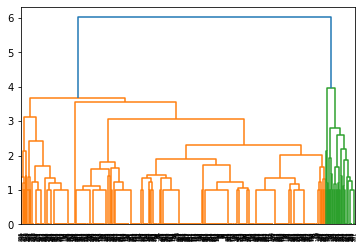

In [5]:
# 2)덴드로그램 그리기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
dendrogram(cluster)
plt.show()

### 비계층적 군집분석
계층적 군집분석 이외의 모든 군집분석 방법이다.
- 군집수를 지정해 자료를 구분하고 구분된 결과로부터 군집수를 조정해나가 최적의 군집화를 이룬다.
- 대용량 데이터에 적용하기 적합하다.
- 비계층적 군집분석 방법은 아래와 같다.
  - 순차적 군집화: 군집의 중심이 정해지고 사전에 지정된 값의 거리안에 있는 모든 개체들이 같은 군집으로 분류된 후 새로운 군집의 중심에 따라 순차적으로 군집화가 반복되는 군집분석 방법이다. Kmeans이 이에 해당된다.
  - 동시 군집화: 사전에 지정된 일정 값 안에 해당하는 개체들을 소속시킴으로써 몇 개의 군집을 동시에 결정하는 방법
  - 최적할당 군집화: 사전에 주어진 군집의 수를 형성하기 위해 군집 내의 평균거리를 계산하는 최적화 기준을 도출하고 이에 따라 최소의 군집에서 다른 군집으로 다시 할당될 수 있는 군집분석 방법이다.

### $\blacktriangleright$ KMeans
각 군집과 개체간 거리 편차의 분산을 최소화하는 방향으로 K개의 군집을 형성하는 방법이다.
- 군집화 속도가 빨라 대용량 데이터에 적합하다.
- 군집개수(K)를 명확히 지정해야 한다는 점과 초기값에 따라 분석결과가 상이할 수 있다.
- 전체 개체 중 K개의 초기값을 임의로 선택하고 각 초기값과 가까운 한 개의 개체를 선택하고 군집의 중심개체를 갱신해 개체 선택하길 반복한다.

In [7]:
# 1)Kmeans 수행
from sklearn.cluster import KMeans
X = data[['Recency','Frequency','Monetary']]
model = KMeans(n_clusters=3, max_iter=20, random_state=19).fit(X) # random state에 따라 초기값 선택함
X['cluster_id'] = model.labels_

C:\Users\ha\AppData\Local\Temp\ipykernel_2156\2244389451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_id'] = model.labels_


In [9]:
# 2)군집별 특징 분석
print('--------군집별 개체수--------')
display(X.cluster_id.value_counts())

--------군집별 개체수--------


0    512
2    411
1     77
Name: cluster_id, dtype: int64

In [10]:
# 2번 군집은 최근까지도 구매했고 빈도도 많고 금액도 커 우량고객이라 이름 붙일 수 있다.
# 0, 1번 군집은 최근 구매에서만 차이가 명확한 군집들이다. 최근 구매이력이 없는 1번 군집은 휴먼고객으로 봄이 맞다.
print('-------분석변수 평균---------')
X.groupby('cluster_id')[['Recency','Frequency','Monetary']].mean()

-------분석변수 평균---------


,Recency,Frequency,Monetary
cluster_id,,,
0,6.835938,3.212891,2.892578
1,1.779221,3.207792,3.753247
2,6.939173,4.600973,5.768856


###  $\blacktriangleright$ 코호넨 네트워크 분석